In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import itertools

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disabpd.option_context('display.max_columns', 300)le copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps.get_cmap('RdYlBu')

In [2]:
def delta_a_mu(m_s, m_f):
    
    k = (m_f/m_s)**2
    l_R = 2.5
    m_mu = 105.66e-3 #GeV
    
    if (m_f/m_s < (1-1e-3)) or (m_f/m_s > (1+1e-3)):
        return (1/96) * (l_R*m_mu/(np.pi*m_s))**2 * (2 + 3*k - 6 * k**2 + k**3 + 6*k * np.log(k))/((1-k)**4)
    else:
        return 0.5 * (1/96) * (l_R*m_mu/(np.pi*m_s))**2

In [3]:
def lambda_R(m_s,m_f):
    
    k = (m_f/m_s)**2
    l_R = 2.5
    m_mu = 105.66e-3 #GeV
    delta_mu = exp - sm
    
    if (m_f/m_s < (1-1e-3)) or (m_f/m_s > (1+1e-3)):
        return np.sqrt(delta_mu * 96 * ((np.pi*m_s)/(m_mu))**2 * (((1-k)**4)/(2 + 3*k - 6 * k**2 + k**3 + 6*k * np.log(k))))
    else:
        return np.sqrt(delta_mu * 96 * ((np.pi*m_s)/(m_mu))**2 * 2)

In [4]:
#Standard Model value
sm = 116591810e-11
sigma_sm = 43e-11

#FNAL value
fnal = 116592055e-11
sigma_fnal = 24e-11

#BNL value
bnl =  116592080e-11
sigma_bnl = 63e-11

#Experiment average
exp =  116592059e-11
sigma_exp = 22e-11

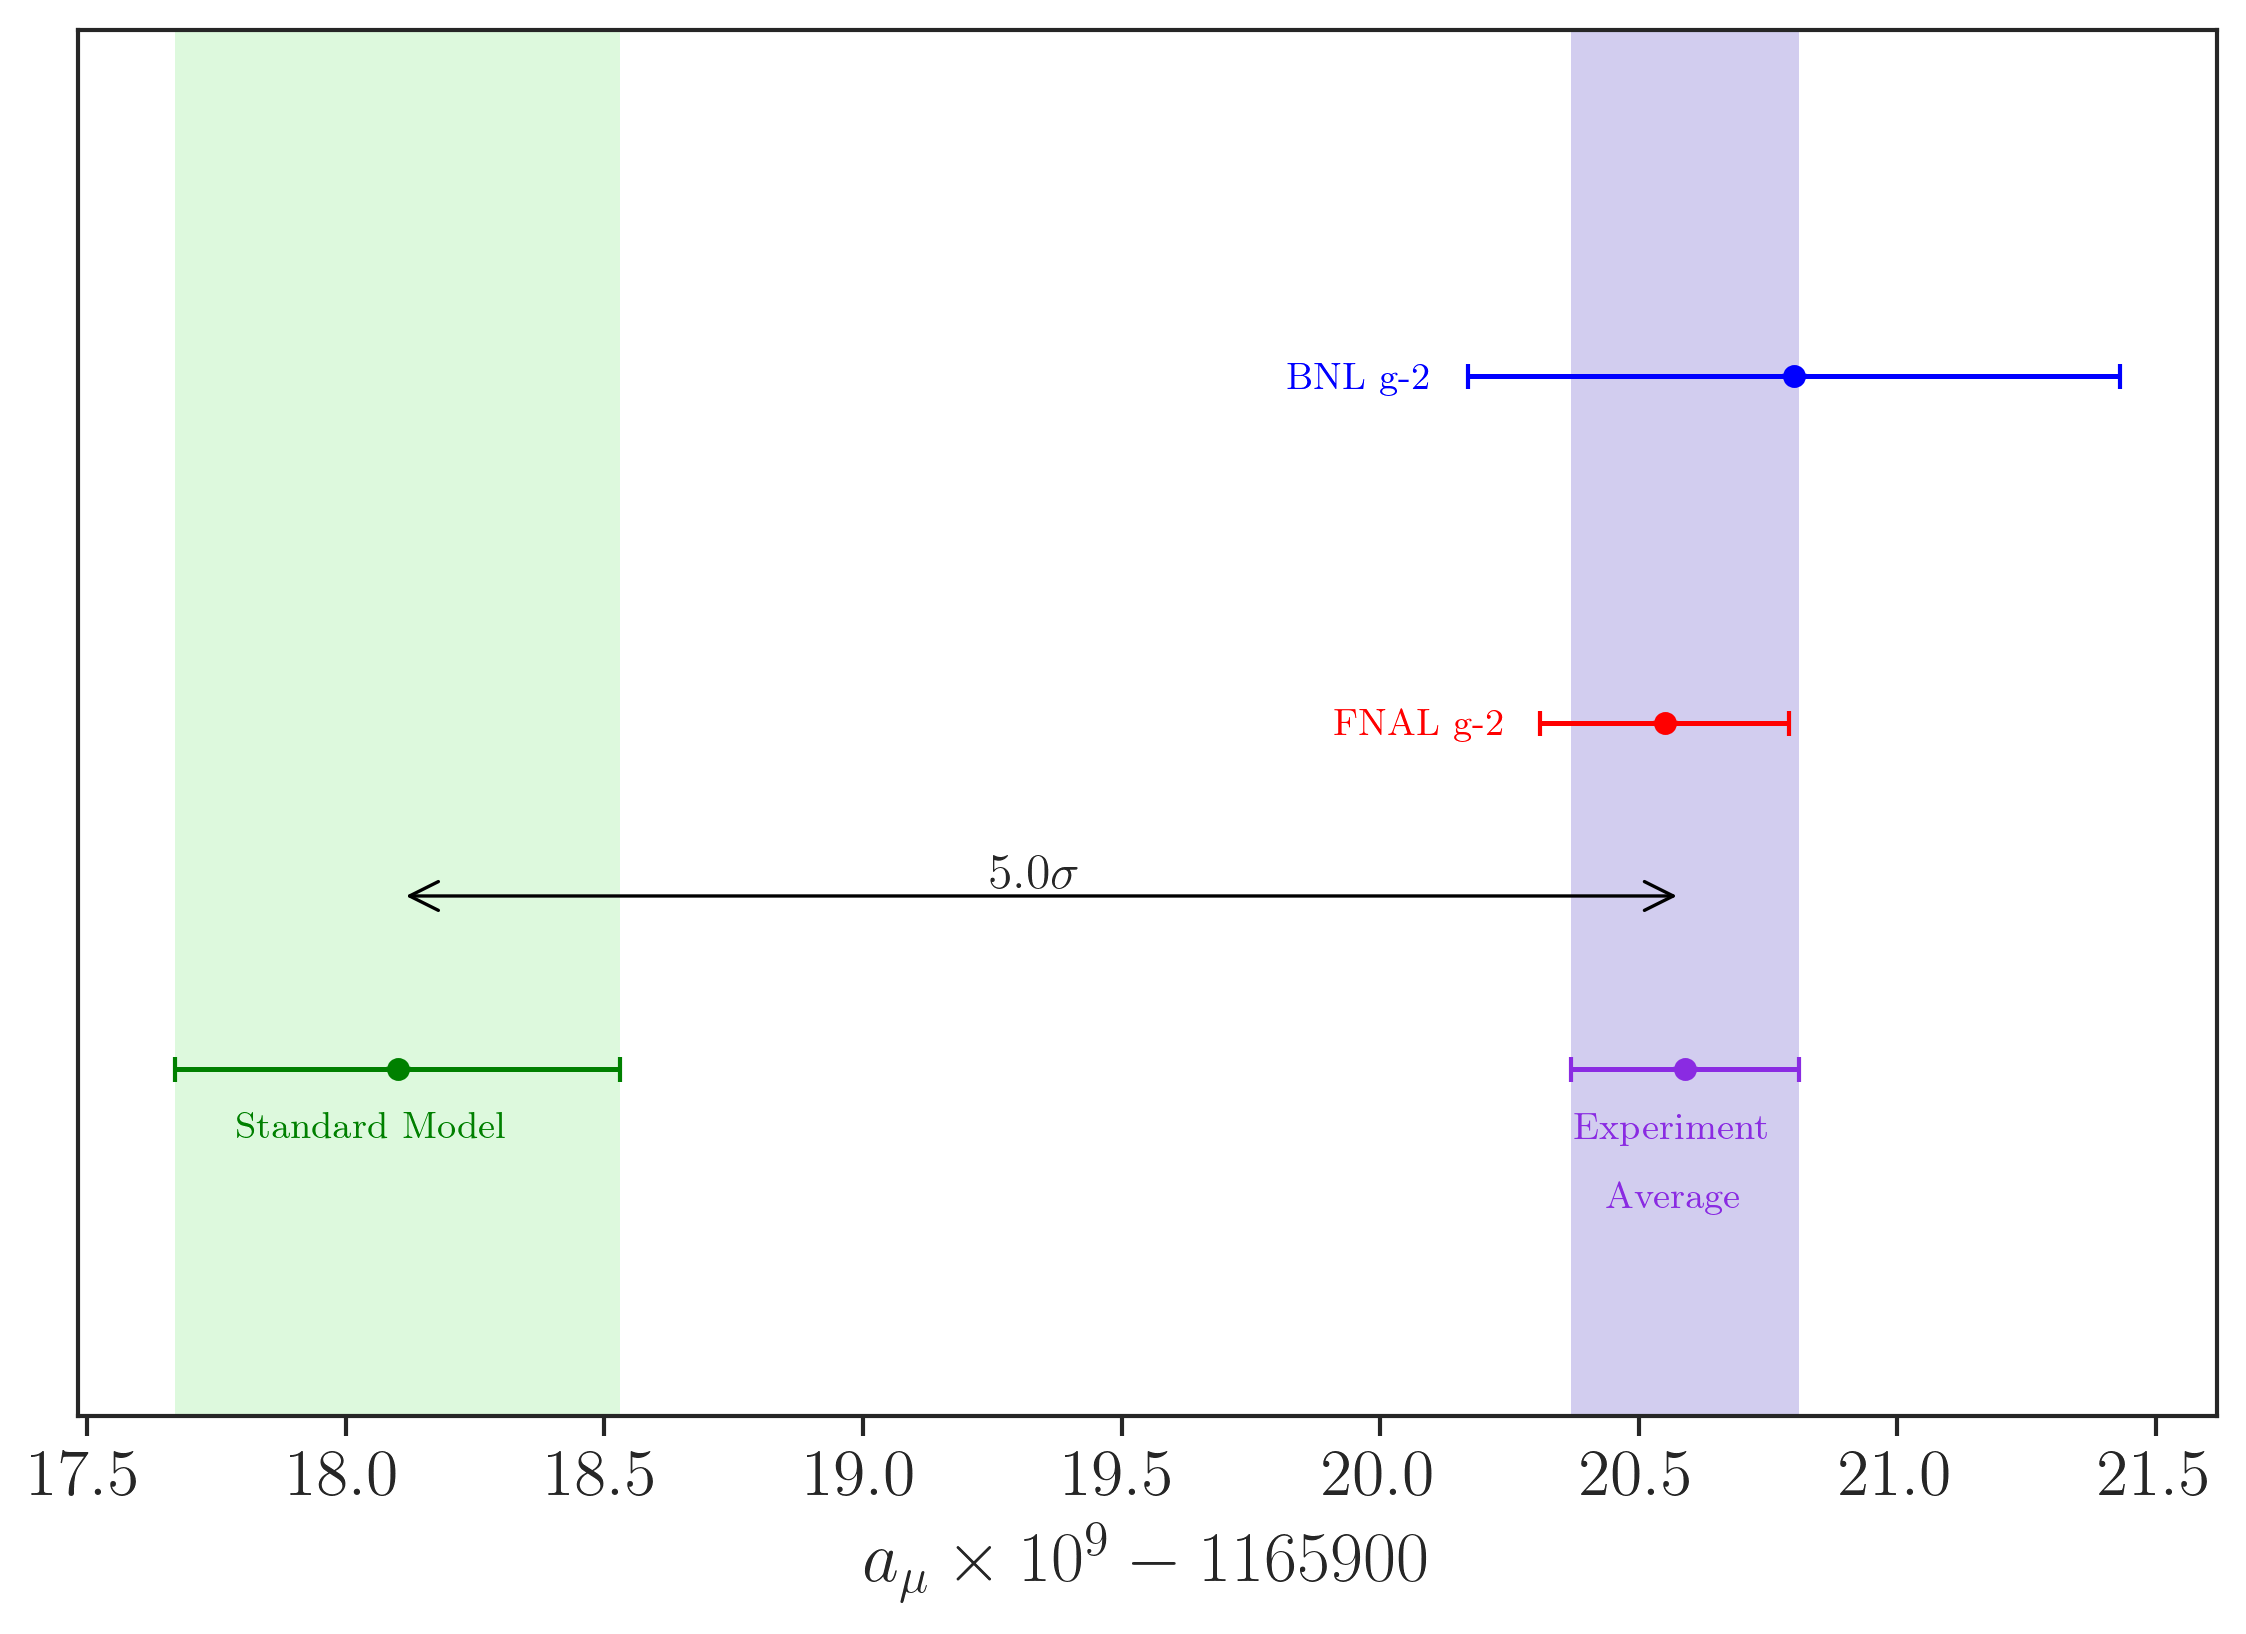

In [5]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 

#Standard Model
plt.errorbar(sm*1e9-1165900, 1,0, sigma_sm*1e9, 'o', ms = 4.5, capsize=3, color = "green", label = "Standard Model")
plt.annotate("Standard Model", xy = (sm*1e9-1165900- sigma_sm*1e9+0.12,0.9), size = 9, color = "Green")
plt.axvspan(sm*1e9-1165900 - sigma_sm*1e9 , sm*1e9-1165900  +sigma_sm*1e9 , color='lightgreen', alpha=0.3, lw=0)

#Experimental Average
plt.errorbar(exp*1e9-1165900, 1,0, sigma_exp*1e9, 'o', ms = 4.5, capsize=3, color = "blueviolet",
             label = "Experimental average")
plt.axvspan(exp*1e9-1165900 - sigma_exp*1e9 , exp*1e9-1165900  +sigma_exp*1e9 , color='slateblue', alpha=0.3
            , lw=0)
plt.annotate("Experiment", xy = (exp*1e9-1165900- sigma_exp*1e9+0.005,0.9), size = 9, color = "blueviolet")
plt.annotate("Average", xy = (exp*1e9-1165900- sigma_exp*1e9+0.067,0.8), size = 9, color = "blueviolet")


#FNAL
plt.errorbar(fnal*1e9-1165900, 1.5,0, sigma_fnal*1e9, 'o', ms = 4.5, capsize=3, color = "red", label = "FNAL")
plt.annotate("FNAL g-2", xy = (fnal*1e9-1165900- sigma_fnal*1e9-0.4,1.483), size = 9, color = "red")

#BNL
plt.errorbar(bnl*1e9-1165900, 2,0, sigma_bnl*1e9, 'o', ms = 4.5, capsize=3, color = "blue", label = "BNL")
plt.annotate("BNL g-2", xy = (bnl*1e9-1165900- sigma_bnl*1e9-0.35,1.983), size = 9, color = "blue")


#Arrow
plt.annotate('', xy=(sm*1e9-1165900, 1.25), xytext=(exp*1e9-1165900, 1.25), arrowprops={'arrowstyle': '<->', "color": "black"})
plt.annotate(r'$5.0\sigma$', xy=((sm*1e9-1165900 + exp*1e9-1165900)/2-0.1, 1.26), size = 12)

plt.ylim([0.5,2.5])
plt.yticks([])
plt.xlabel(r"$a_\mu \times 10^{9} - 1165900$")
#plt.legend()
plt.savefig("A_mu_Graph.pdf", dpi = 500)
plt.show()

# Mapa de calor das massas

### Como estimar o intervalo de massas que explicaria a diferença entre o experimento e o Modelo Padrão

Dado que $\chi^2$ é:

$$\chi^2 = \frac{[a_{\mu_{exp}}- \left(a_{\mu_{SM}} + \Delta a_{\mu_{NP}}\right) ]^2}{\sigma_{exp}^2 + \sigma_{SM}^2}$$

O valor de $\Delta a_{\mu_{NP}}$ que explica a diferença entre o valor do experimento e do previsto pelo Modelo Padrão deve obedecer a seguinte relação

$$\chi^2 \leq \chi_{min}^2 + \Delta \chi^2$$

Neste caso, o menor valor de $\chi^2$ que podemos obter é $0$, isto é, $\chi^2_{min} = 0$. Assim:

$$\frac{[a_{\mu_{exp}}- \left(a_{\mu_{SM}} + \Delta a_{\mu_{NP}}\right) ]^2}{\sigma_{exp}^2 + \sigma_{SM}^2} \leq  \Delta \chi^2$$

$$[a_{\mu_{exp}}- \left(a_{\mu_{SM}} + \Delta a_{\mu_{NP}}\right) ]^2 \leq  \Delta \chi^2\left(\sigma_{exp}^2 + \sigma_{SM}^2\right)$$
$$- \sqrt{\Delta \chi^2\left(\sigma_{exp}^2 + \sigma_{SM}^2\right)} \leq a_{\mu_{exp}}- \left(a_{\mu_{SM}} + \Delta a_{\mu_{NP}}\right)  \leq  \sqrt{\Delta \chi^2\left(\sigma_{exp}^2 + \sigma_{SM}^2\right)}$$

$$a_{\mu_{SM}} - a_{\mu_{exp}} - \sqrt{\Delta \chi^2\left(\sigma_{exp}^2 + \sigma_{SM}^2\right)} \leq -\Delta a_{\mu_{NP}}  \leq a_{\mu_{SM}} - a_{\mu_{exp}} + \sqrt{\Delta \chi^2\left(\sigma_{exp}^2 + \sigma_{SM}^2\right)}$$

$$ a_{\mu_{exp}}- a_{\mu_{SM}}  - \sqrt{\Delta \chi^2\left(\sigma_{exp}^2 + \sigma_{SM}^2\right)} \leq \Delta a_{\mu_{NP}}  \leq a_{\mu_{exp}}- a_{\mu_{SM}}  + \sqrt{\Delta \chi^2\left(\sigma_{exp}^2 + \sigma_{SM}^2\right)}$$

Para que $\Delta a_{\mu_{NP}}$ explique a diferença entre o valor experimental e o previsto pelo Modelo Padrão com uma significância de $1\sigma$, então $\Delta \chi^2 = 2.30$. Portanto:


$$ a_{\mu_{exp}}- a_{\mu_{SM}}  - \sqrt{2.3\left(\sigma_{exp}^2 + \sigma_{SM}^2\right)} \leq \Delta a_{\mu_{NP}}  \leq a_{\mu_{exp}}- a_{\mu_{SM}}  + \sqrt{2.3\left(\sigma_{exp}^2 + \sigma_{SM}^2\right)}$$


In [6]:
delta_chi_sq = 2.3
max_delta = exp - sm + np.sqrt(delta_chi_sq*(sigma_sm**2 + sigma_exp**2))
min_delta = exp - sm - np.sqrt(delta_chi_sq*(sigma_sm**2 + sigma_exp**2))

print(min_delta, max_delta)

1.7574769628447094e-09 3.2225230372055126e-09


In [7]:
#m_S = np.arange(90,300.05,0.1)
#m_F = np.arange(90,300.05,0.1)
m_S = np.linspace(90.,300.05,500)
m_F = np.linspace(90.,300.05,500)

In [8]:
pts = []
for ms,mf in itertools.product(m_S,m_F):
    pts.append([ms,mf,delta_a_mu(ms,mf)])
pts = np.array(pts)

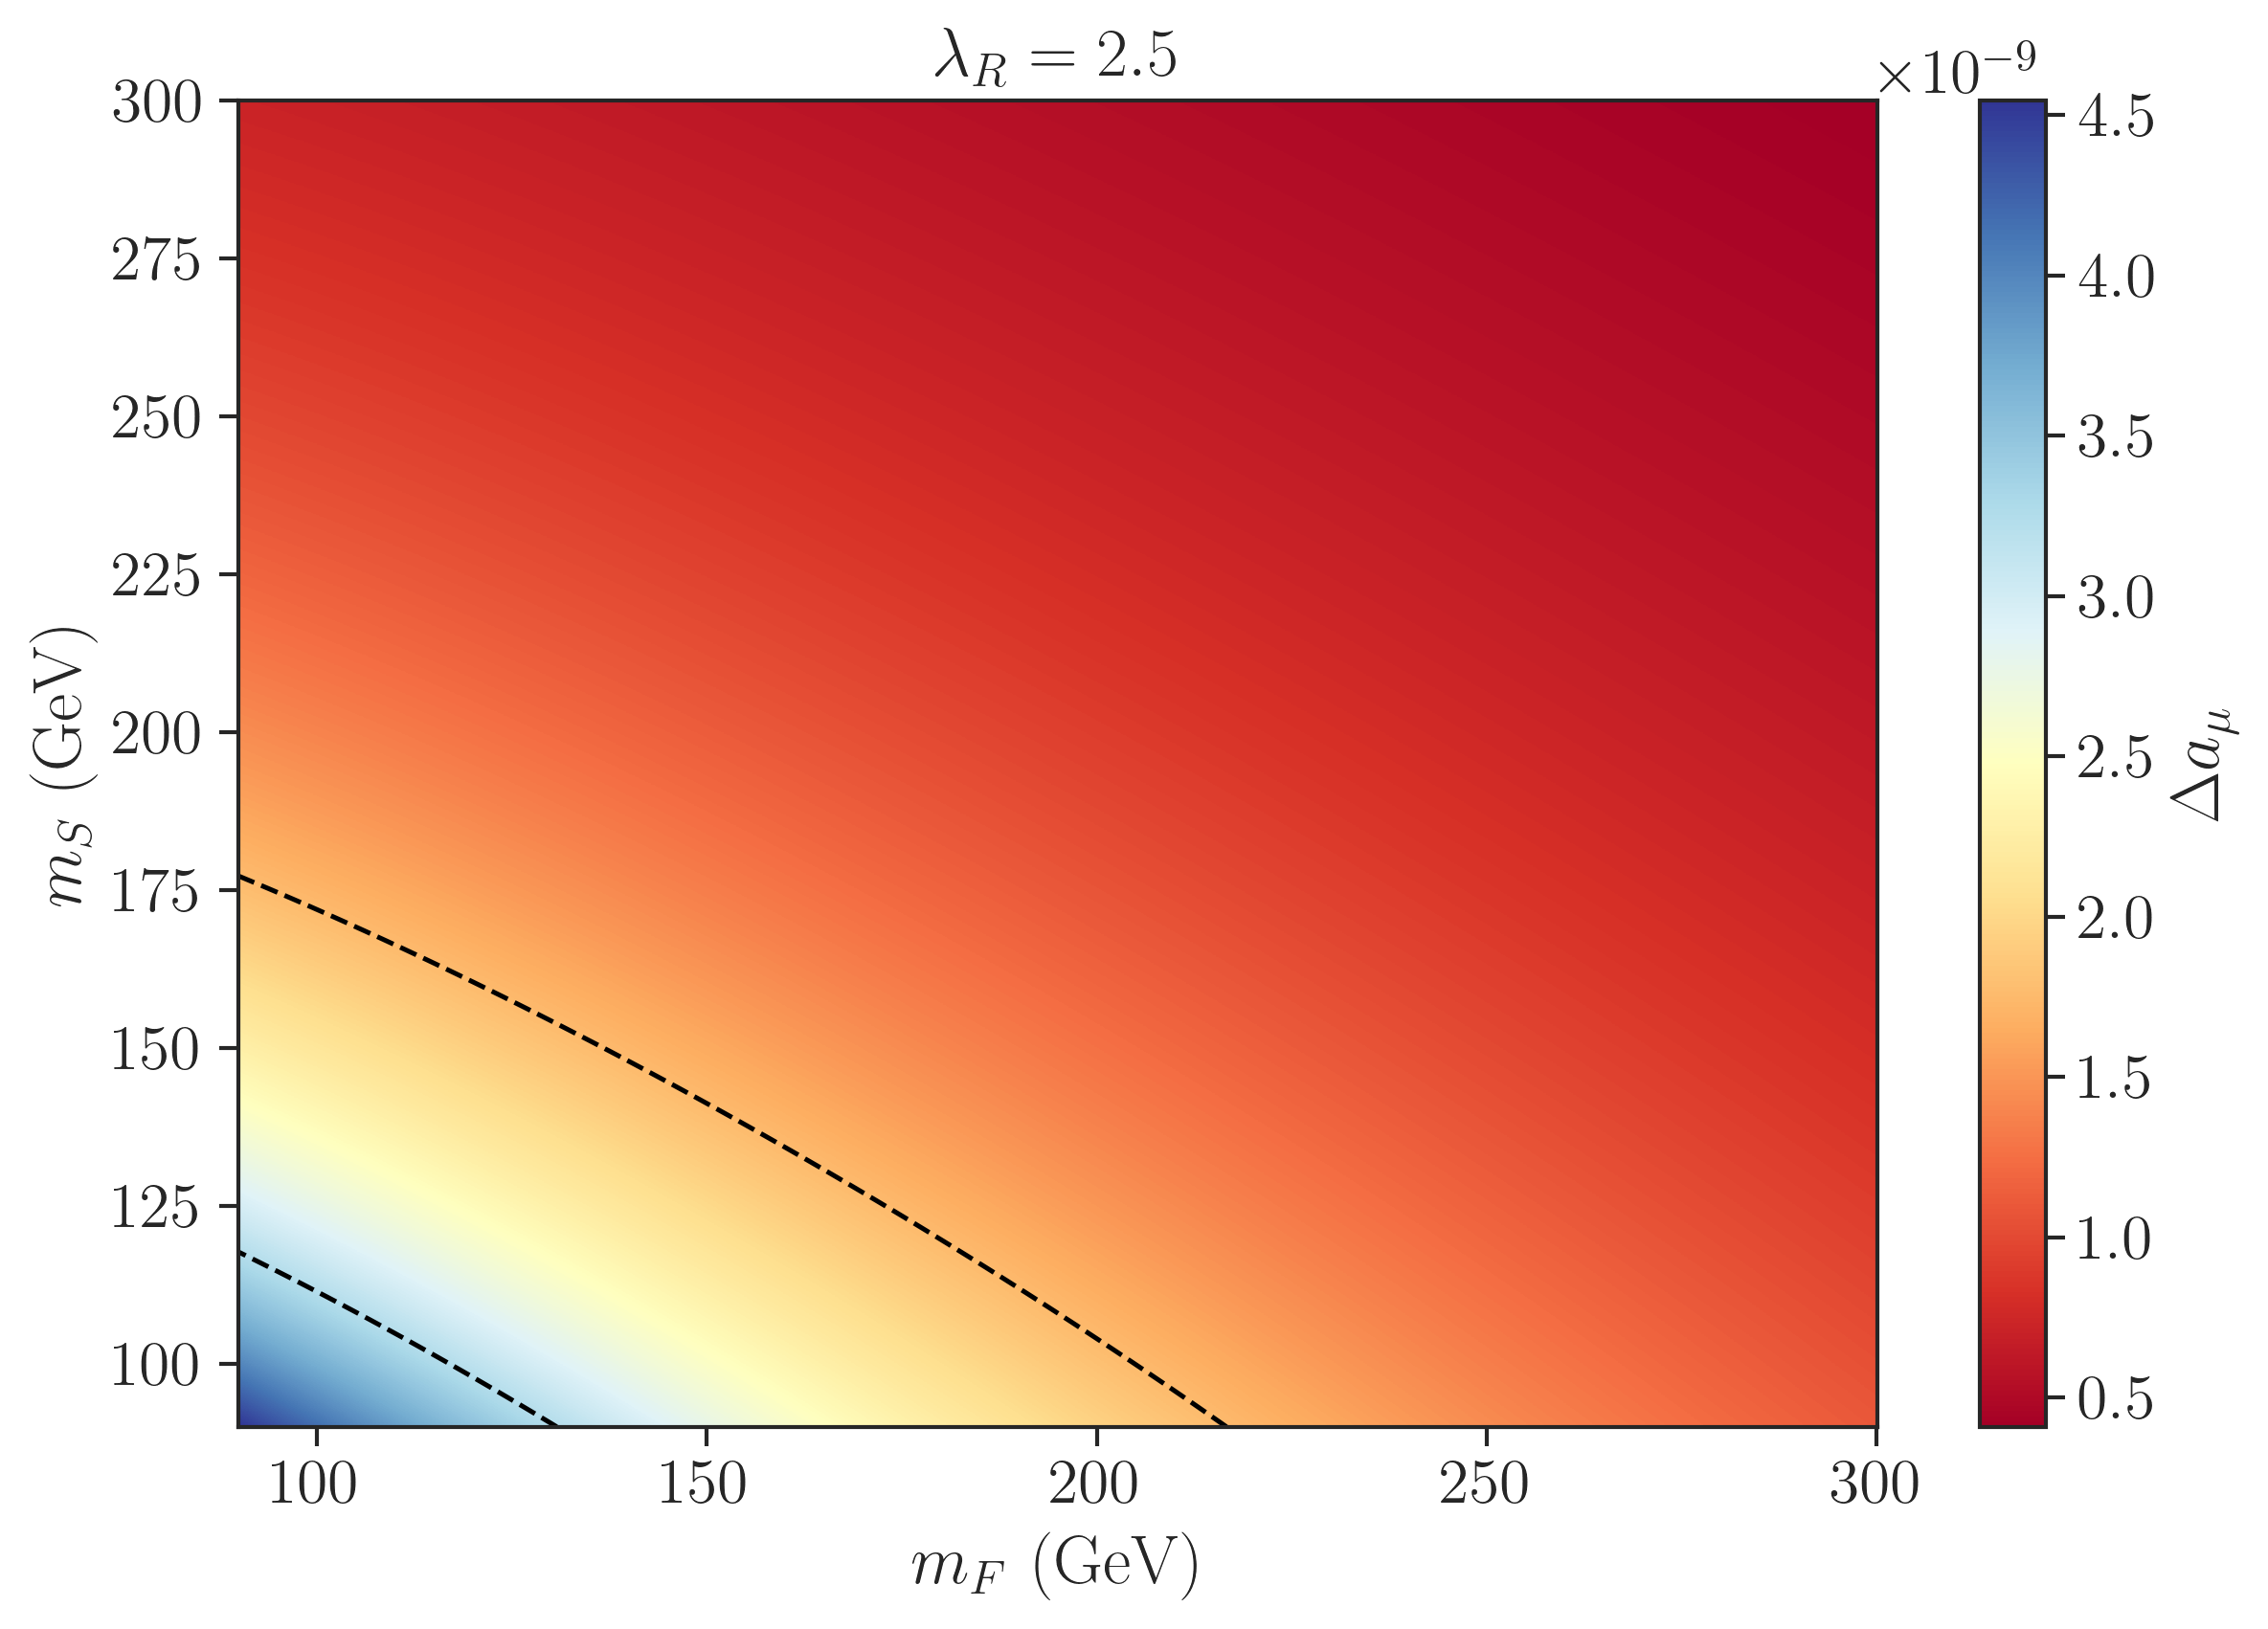

In [9]:
#plt.figure(figsize=(6,4))
fig = plt.figure(figsize = [9.2,6], dpi = 300)
x = m_F
y = m_S
z = np.abs(pts[:,2])
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto')
plt.colorbar(label=r'$\Delta a_\mu$')
plt.xlabel(r'$m_{F}$ (GeV)')
plt.ylabel(r'$m_{S}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, [min_delta,max_delta], colors='black',linestyles='dashed')
plt.title(r'$\lambda_R = 2.5$')
plt.show()

In [10]:
print(exp - sm)

2.490000000025111e-09


# Mapa de calor do parâmetro

Nós sabemos que:

$$\Delta a_\mu = \frac{\lambda_R^2m_\mu^2}{96\pi^2m_S^2}  \frac{\left(2 + 3\kappa -6\kappa^2 + \kappa^3 + 6\kappa \ln{\kappa}\right)}{(1-\kappa)^4}$$

Desta forma:

$$\lambda_R^2 = \Delta a_\mu\frac{96\pi^2m_S^2}{m_\mu^2} \ \frac{(1-\kappa)^4}{\left(2 + 3\kappa -6\kappa^2 + \kappa^3 + 6\kappa \ln{\kappa}\right)}$$

$$\lambda_R = \frac{4\pi m_S}{m_\mu} \ \sqrt{ \Delta a_\mu\frac{6(1-\kappa)^4}{\left(2 + 3\kappa -6\kappa^2 + \kappa^3 + 6\kappa \ln{\kappa}\right)}}$$

In [11]:
M_S = np.linspace(90.,300.05,500)
M_F = np.linspace(90.,300.05,500)

In [12]:
pts1 = []
for ms,mf in itertools.product(M_S,M_F):
    pts1.append([ms,mf,lambda_R(ms,mf)])
pts1 = np.array(pts1)

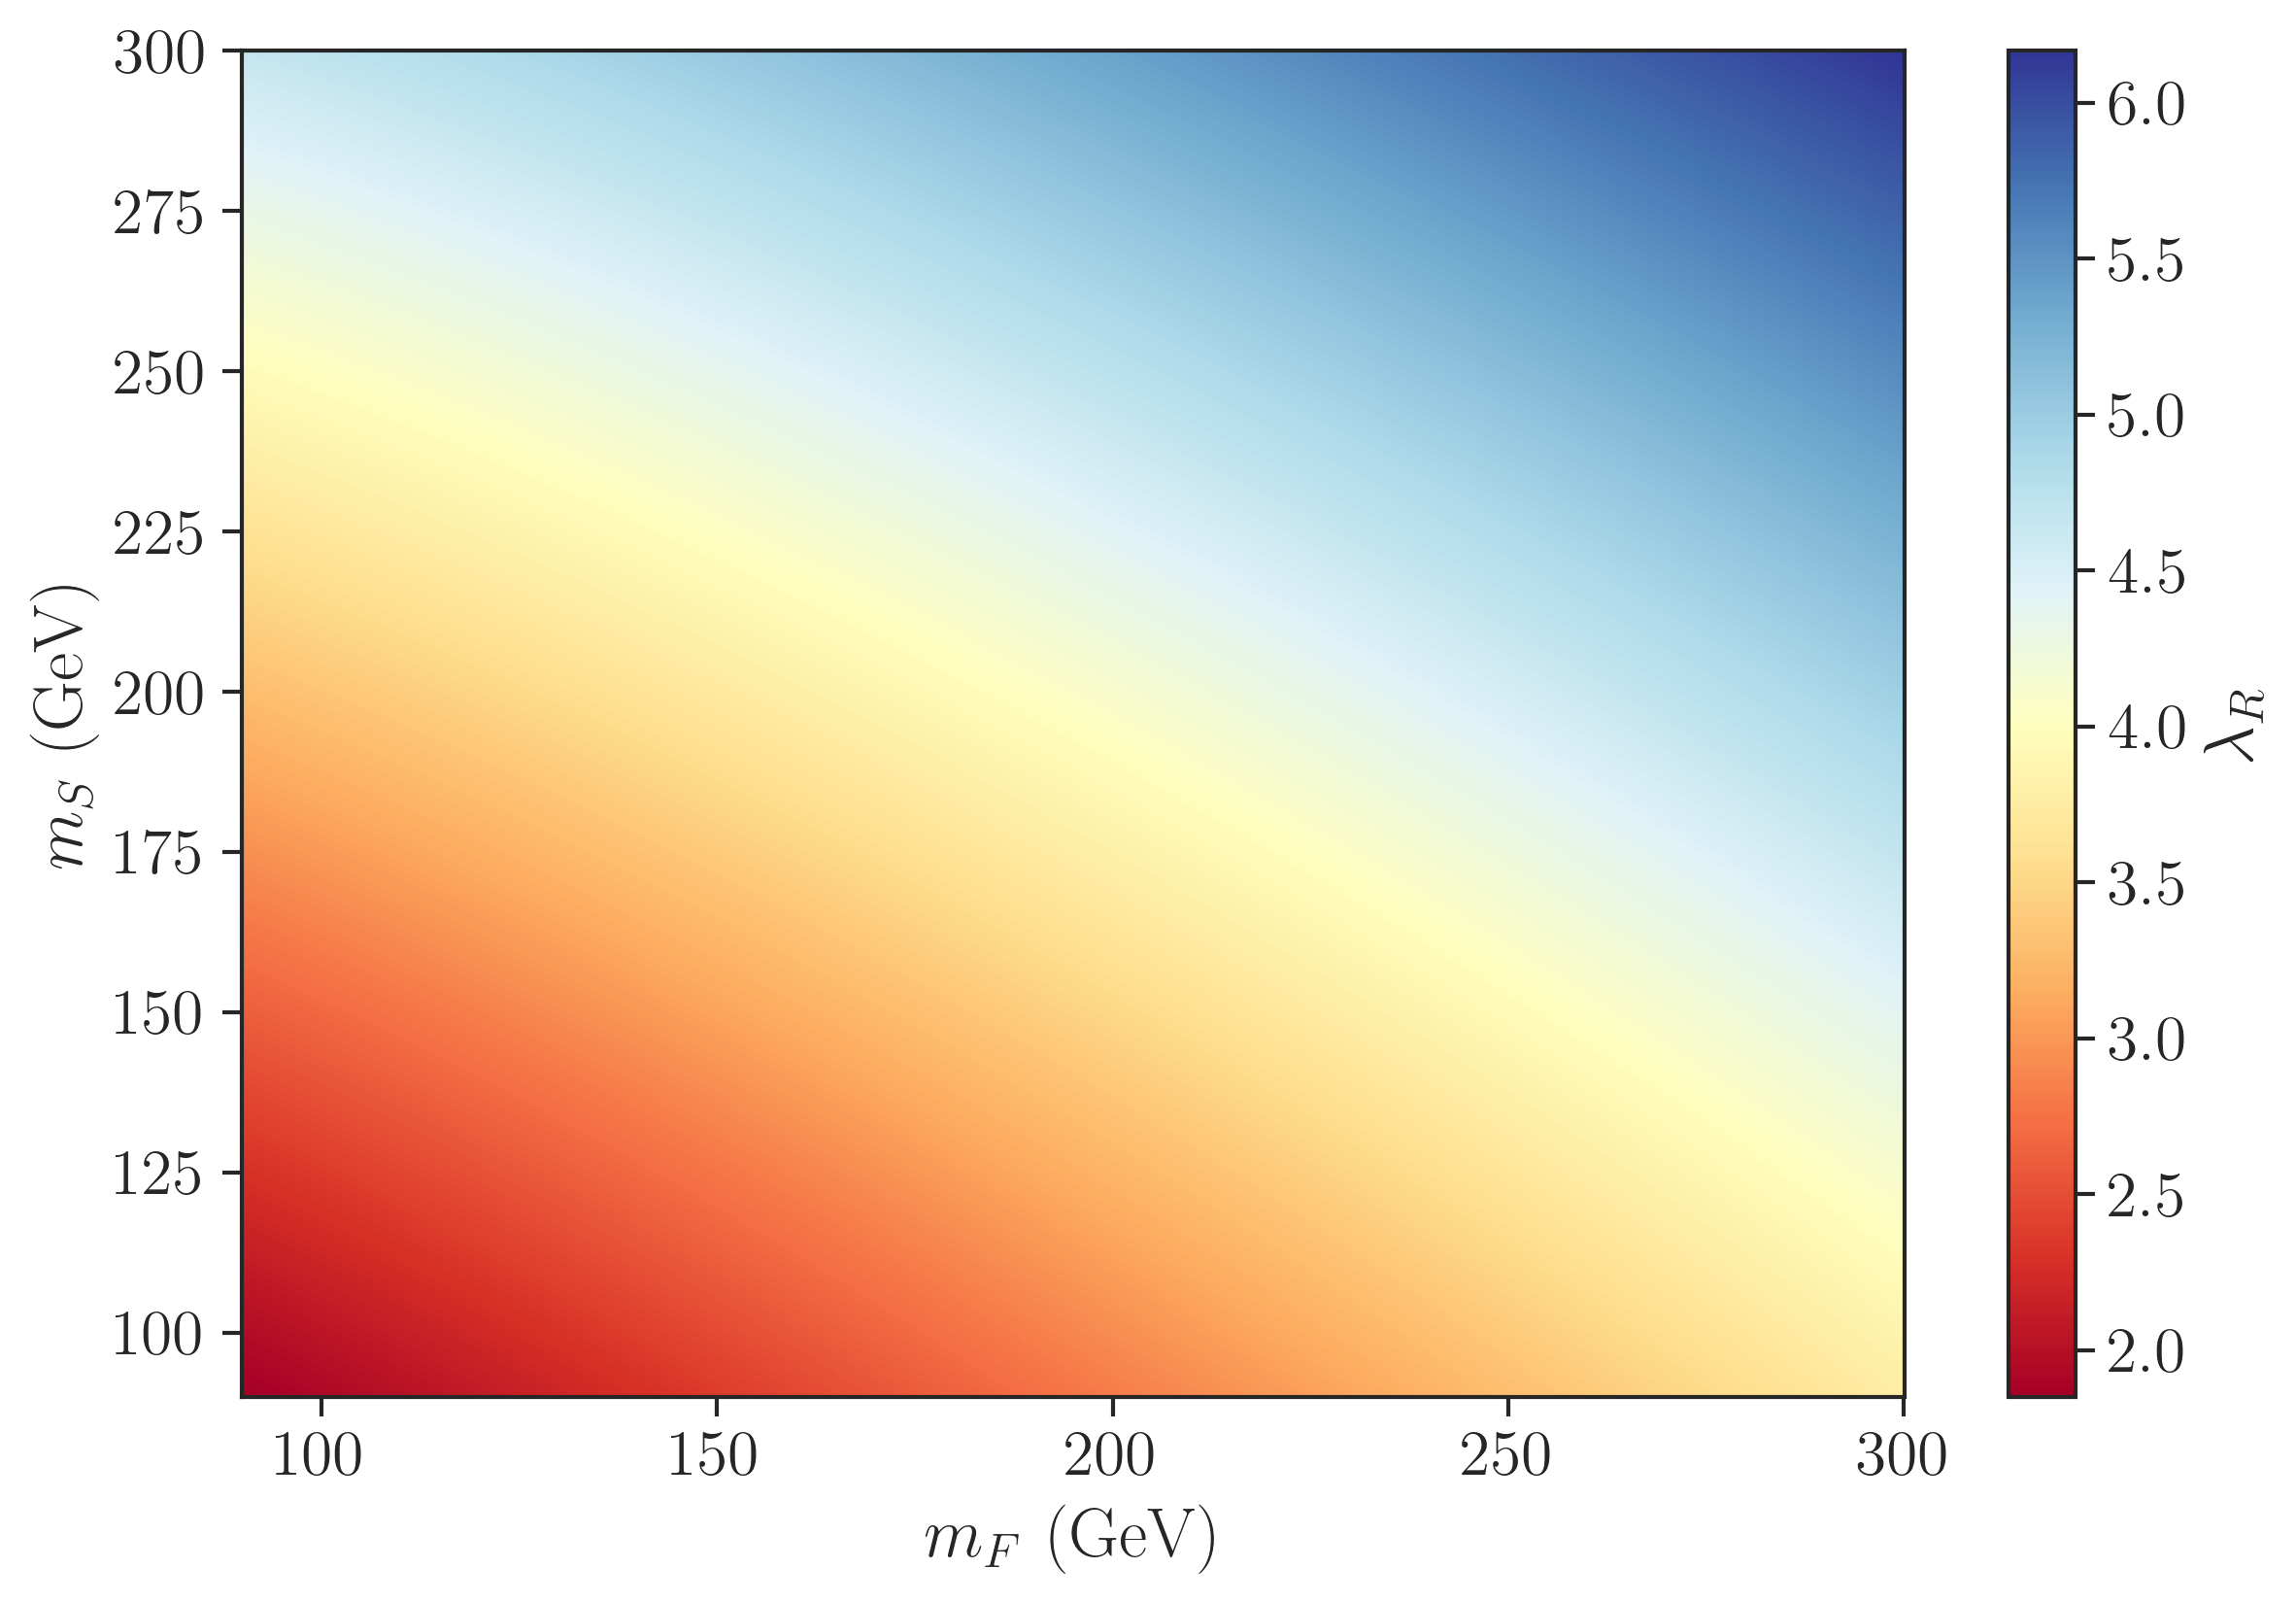

In [22]:
#plt.figure(figsize=(6,4))
fig = plt.figure(figsize = [9.2,6], dpi = 300)
x = M_F
y = M_S
z = np.abs(pts1[:,2])
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto')
plt.colorbar(label=r'$\lambda_R$')
plt.xlabel(r'$m_{F}$ (GeV)')
plt.ylabel(r'$m_{S}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, [4*np.pi], colors='black',linestyles='dashed')



plt.show()